In [150]:
import pandas as pd
import numpy as np
from scipy import optimize as opt
import matplotlib.pyplot as plt

In [166]:
data = pd.read_csv('data.csv', na_values = '.')
data['PCECC96'] = pd.to_numeric(data['PCECC96'])
data['WILL5000IND'] = pd.to_numeric(data['WILL5000IND'])
data['GDPDEF'] = pd.to_numeric(data['GDPDEF'])
data['TB3MS'] = pd.to_numeric(data['TB3MS'])
data.head(5)

,DATE,PCECC96,WILL5000IND,GDPDEF,TB3MS
0,1971-01-01,3156.978,NaN,22.391,3.840000
1,1971-04-01,3185.993,1.136667,22.685,4.250000
2,1971-07-01,3211.394,1.113333,22.916,5.010000
3,1971-10-01,3264.679,1.113333,23.107,4.230000
4,1972-01-01,3307.767,1.240000,23.458,3.436667


In [167]:
data = data.rename(columns = {'PCECC96': 'Consumption',\
                       'TB3MS': 'Tbill',\
                       'WILL5000IND': 'Return',\
                       'GDPDEF': 'Deflator'})
data.head(5)

,DATE,Consumption,Return,Deflator,Tbill
0,1971-01-01,3156.978,NaN,22.391,3.840000
1,1971-04-01,3185.993,1.136667,22.685,4.250000
2,1971-07-01,3211.394,1.113333,22.916,5.010000
3,1971-10-01,3264.679,1.113333,23.107,4.230000
4,1972-01-01,3307.767,1.240000,23.458,3.436667


In [168]:
data.insert(5, "Real Return", \
            (1 + data['Return'].pct_change())/ \
            (1 + data['Deflator'].pct_change()) )
data.insert(6, "Real Tbill", \
            (1 + data['Tbill'].pct_change())/ \
            (1 + data['Deflator'].pct_change()) )
data.head(5)

,DATE,Consumption,Return,Deflator,Tbill,Real Return,Real Tbill
0,1971-01-01,3156.978,NaN,22.391,3.840000,NaN,NaN
1,1971-04-01,3185.993,1.136667,22.685,4.250000,NaN,1.092427
2,1971-07-01,3211.394,1.113333,22.916,5.010000,0.969599,1.166941
3,1971-10-01,3264.679,1.113333,23.107,4.230000,0.991734,0.837332
4,1972-01-01,3307.767,1.240000,23.458,3.436667,1.097107,0.800294


In [169]:
data = data.set_index('DATE')
data.head(5)

,Consumption,Return,Deflator,Tbill,Real Return,Real Tbill
DATE,,,,,,
1971-01-01,3156.978,NaN,22.391,3.840000,NaN,NaN
1971-04-01,3185.993,1.136667,22.685,4.250000,NaN,1.092427
1971-07-01,3211.394,1.113333,22.916,5.010000,0.969599,1.166941
1971-10-01,3264.679,1.113333,23.107,4.230000,0.991734,0.837332
1972-01-01,3307.767,1.240000,23.458,3.436667,1.097107,0.800294


In [170]:
# some functions
mu = lambda c, γ: c**(-γ)
u = lambda c, γ: c**(1-γ)/(1-γ)

### 1. Compute $\gamma$

In [204]:
β = 0.99

def SDF(γ, ct, ctp1):
    
    mtp1 = β * mu(ct, γ) / mu(ctp1, γ)
    
    return mtp1

def func5(γ):
    
    M = SDF(γ,data['Consumption'], data['Consumption'].shift(1))
    R = data['Real Return']
    
    EM = M.mean(skipna = True)
    ER = R.mean(skipna = True)

    R = data['Real Return']
    M = SDF(γ,data['Consumption'], data['Consumption'].shift(1))
    
    covar = R.cov(M)
    
    f1 = covar + EM * ER - 1
    
    return f1

In [205]:
opt.broyden1(func5, 1)

array(1.15788216)

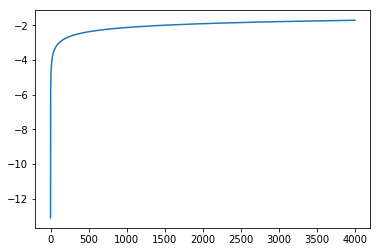

In [206]:
plt.plot(np.linspace(0.01, 4000, 4000), u(np.linspace(0.01, 4000, 4000), 1.15788216))

### 2. Reasonable?
- I think this is reasonable, as we have the utility function convex, and is reasonablly flat when it gets away from 0.
- If really want to determine, run lab experiments or take this parameter to other places and see whether that matches with the data or not.

### 3. use moment restriction equation 7

In [ ]:
def func7(γ):
    
    